In [1]:
from jaxnn import dataset
from jaxnn.model import Model
from jaxnn import nn
from jaxnn import optimizers
from jaxnn import loss
import jax
from jax import numpy as jnp
from matplotlib import pyplot as plt

In [2]:
dataloader = dataset.mnist_dataloader(map_fn=lambda x: x / 255., batch_size=256)

In [3]:
model = Model([
    nn.flatten(),
    nn.dense(256),
    nn.relu(),
    nn.dropout(),
    # nn.dense(64),
    # nn.relu(),
    nn.dense(10),
    nn.softmax()
])
model.fit(data_loader=dataloader,
          optimizer=optimizers.sgd(lr=1e-1),
          loss_fn=loss.categorical_cross_entropy(from_logits=False),
          epochs=50,
          metrics=['accuracy'])


epoch: [  1\50 -------------------- loss: 0.785 valid loss: 0.848 valid accuracy: 0.753
epoch: [  2\50 -------------------- loss: 0.541 valid loss: 0.516 valid accuracy: 0.854
epoch: [  3\50 #------------------- loss: 0.397 valid loss: 0.433 valid accuracy: 0.877
epoch: [  4\50 #------------------- loss: 0.345 valid loss: 0.377 valid accuracy: 0.891
epoch: [  5\50 ##------------------ loss: 0.355 valid loss: 0.339 valid accuracy: 0.903
epoch: [  6\50 ##------------------ loss: 0.294 valid loss: 0.325 valid accuracy: 0.907
epoch: [  7\50 ##------------------ loss: 0.311 valid loss: 0.292 valid accuracy: 0.916
epoch: [  8\50 ###----------------- loss: 0.227 valid loss: 0.294 valid accuracy: 0.914
epoch: [  9\50 ###----------------- loss: 0.231 valid loss: 0.279 valid accuracy: 0.919
epoch: [ 10\50 ####---------------- loss: 0.220 valid loss: 0.265 valid accuracy: 0.923
epoch: [ 11\50 ####---------------- loss: 0.224 valid loss: 0.242 valid accuracy: 0.931
epoch: [ 12\50 ####-------------

In [4]:
x, y = dataset.mnist_testdata()
x = x / 255.

In [5]:
y_hat = model.predict(x)
model.accuracy(y_hat, y)

DeviceArray(0.9606, dtype=float32)

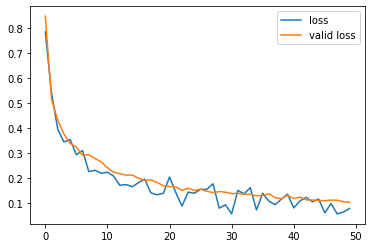

In [6]:
l1, = plt.plot(model.losses)
l2, = plt.plot(model.valid_losses)
plt.legend([l1, l2], ['loss', 'valid loss'])
plt.show()

In [7]:
y_hat = model.predict(x[:10])

In [8]:
jnp.argmax(y_hat, axis=1), y[:10]

(DeviceArray([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int32),
 array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8))